<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/L11_Visualizing_Derivatives_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

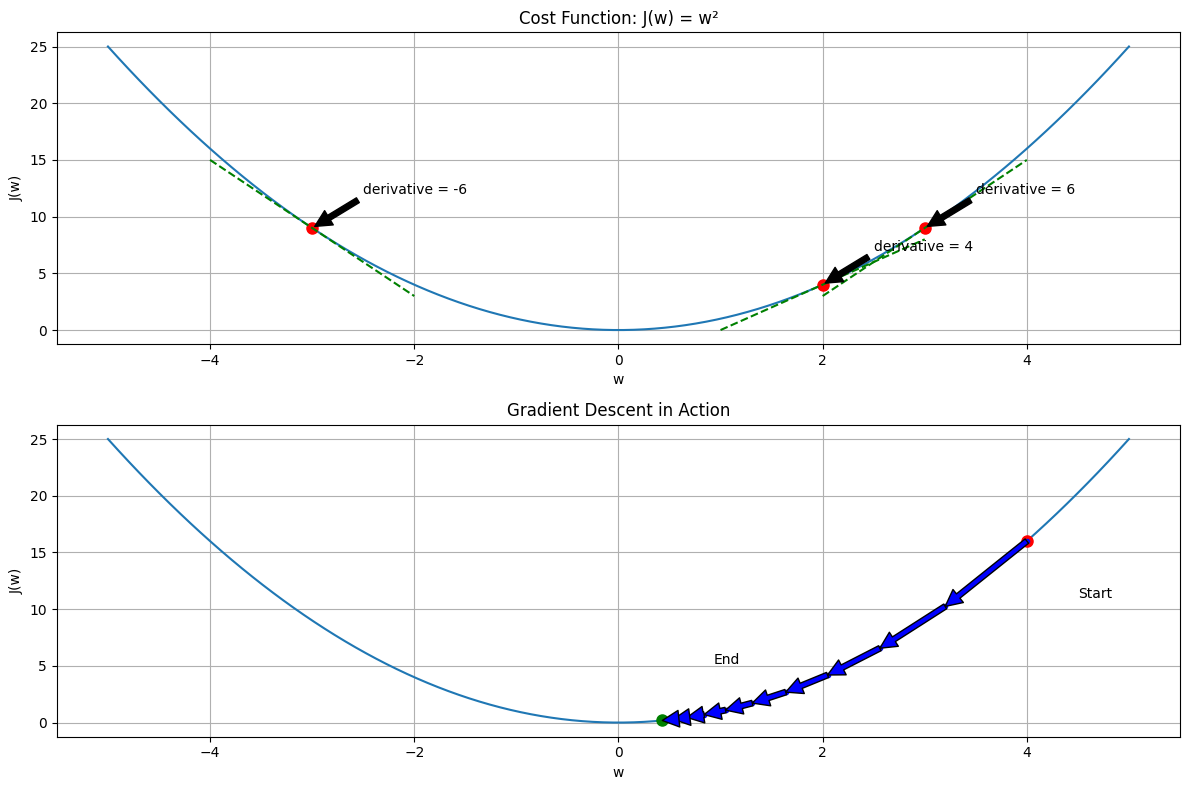


How derivative affects gradient descent step size:
    w     |   J(w)   |  Derivative   |   Step Size   |  New w   
------------------------------------------------------------
    4.0000|   16.0000|         8.0000|         0.8000|    3.2000
    3.2000|   10.2400|         6.4000|         0.6400|    2.5600
    2.5600|    6.5536|         5.1200|         0.5120|    2.0480
    2.0480|    4.1943|         4.0960|         0.4096|    1.6384
    1.6384|    2.6844|         3.2768|         0.3277|    1.3107


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define our cost function J(w) = w²
def cost_function(w):
    return w**2

# Define the derivative of our cost function (2w)
def derivative(w):
    return 2*w

# Create a range of w values to plot
w_values = np.linspace(-5, 5, 100)
j_values = [cost_function(w) for w in w_values]

# Plot the cost function
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(w_values, j_values)
plt.title('Cost Function: J(w) = w²')
plt.xlabel('w')
plt.ylabel('J(w)')
plt.grid(True)

# Add points to show the derivative at w = 3, w = 2, and w = -3
special_points = [3, 2, -3]
for w in special_points:
    j = cost_function(w)
    # Plot the point
    plt.plot(w, j, 'ro', markersize=8)

    # Calculate slope (derivative)
    slope = derivative(w)

    # Plot tangent line
    x_tangent = np.linspace(w-1, w+1, 10)
    y_tangent = slope * (x_tangent - w) + j
    plt.plot(x_tangent, y_tangent, 'g--')

    # Add text annotation
    plt.annotate(f'derivative = {slope}', xy=(w, j), xytext=(w+0.5, j+3),
                 arrowprops=dict(facecolor='black', shrink=0.05))

# Now let's simulate gradient descent
plt.subplot(2, 1, 2)
plt.plot(w_values, j_values)
plt.title('Gradient Descent in Action')
plt.xlabel('w')
plt.ylabel('J(w)')
plt.grid(True)

# Start at w = 4
w = 4
j = cost_function(w)
learning_rate = 0.1
iterations = 10

# Plot starting point
plt.plot(w, j, 'ro', markersize=8)
plt.annotate('Start', xy=(w, j), xytext=(w+0.5, j-5))

# Perform and visualize gradient descent
w_history = [w]
j_history = [j]

for i in range(iterations):
    # Calculate gradient
    grad = derivative(w)

    # Update w
    w_new = w - learning_rate * grad

    # Calculate new cost
    j_new = cost_function(w_new)

    # Store history
    w_history.append(w_new)
    j_history.append(j_new)

    # Plot arrow showing the update
    plt.annotate('', xy=(w_new, j_new), xytext=(w, j),
                arrowprops=dict(facecolor='blue', shrink=0))

    # Update current position
    w = w_new
    j = j_new

# Plot the path taken
plt.plot(w_history, j_history, 'b.-')
plt.plot(w_history[-1], j_history[-1], 'go', markersize=8)
plt.annotate('End', xy=(w_history[-1], j_history[-1]),
             xytext=(w_history[-1]+0.5, j_history[-1]+5))

plt.tight_layout()
plt.show()

# Let's examine how the derivative changes the update size
print("\nHow derivative affects gradient descent step size:")
print("=" * 60)
print(f"{'w':^10}|{'J(w)':^10}|{'Derivative':^15}|{'Step Size':^15}|{'New w':^10}")
print("-" * 60)

w = 4
learning_rate = 0.1
for i in range(5):
    j = cost_function(w)
    grad = derivative(w)
    step = learning_rate * grad
    w_new = w - step
    print(f"{w:10.4f}|{j:10.4f}|{grad:15.4f}|{step:15.4f}|{w_new:10.4f}")
    w = w_new